## DTSC 2301 Spring 2025 Homework #1

In [1]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

import scipy.stats as stats

#### Question 1
Read in the Penguins dataset (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv).  Create a violinplot for penguin body mass.

In [2]:
penguin_data = pd.read_csv("..\Data\penguins.csv", na_values=['NA'])
penguin_data.dropna(inplace=True)
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


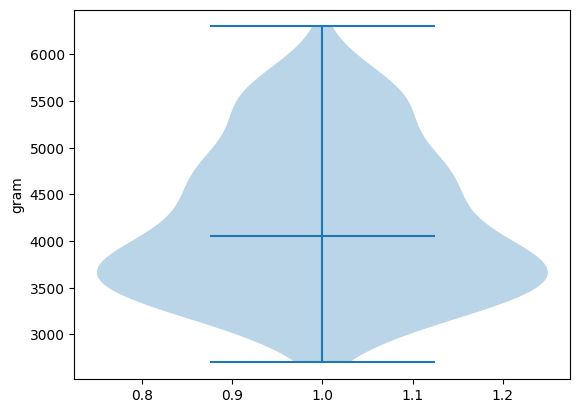

In [3]:
plt.violinplot(penguin_data['body_mass_g'],showmedians=True, showextrema=True)
plt.ylabel('gram')
plt.show()

#### Question 2
Again using the data on body mass of penguins, create and interpret a 95% confidence interval for the mean body weight of a penguin based upon this sample.  

In [4]:
# create 95% confidence interval for population mean
lower, higher = stats.t.interval(confidence=0.95, 
              df=len(penguin_data['body_mass_g'])-1, 
              loc=np.mean(penguin_data['body_mass_g']),  
              scale=stats.sem(penguin_data['body_mass_g']))
print(f"95% Confidence Interval for Penguin Body Mass: {lower}, {higher}")

95% Confidence Interval for Penguin Body Mass: 4120.256132623127, 4293.857981490987


#### Question 3
Using the Ames Housing Data (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv), create a 92% confidence interval for the mean above grade (ground) living area square feet (GrLivArea).  Interpret this interval in the context of these data.

In [5]:
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
ames.replace([' ?'],np.nan)
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
living_area = ames['GrLivArea'].dropna()

lower, higher = stats.t.interval(confidence=0.92, 
              df=len(living_area)-1, 
              loc=np.mean(living_area),  
              scale=stats.sem(living_area))
print(f"92% Confidence Interval for ground living area: {lower}, {higher}")

92% Confidence Interval for ground living area: 1491.3706943731436, 1539.5567028871305


#### Question 4
Using the Ames Housing Data, create a 90% confidence interval for the standard deviation of Sale Price using the bootstrap.  Interpret this interval in the context of these data.

In [7]:
price = ames['SalePrice']
lower, upper = stats.t.interval(confidence=0.90, 
              df=len(price)-1, 
              loc=np.mean(price),  
              scale=stats.sem(price))
print(lower, upper)

177499.1991669783 184343.1926138436


In [8]:
np.random.seed(123)
price = ames['SalePrice']
mean = np.mean(price)
print("Mean price in the original data is", mean)

n=len(price)

n_reps = 5000


boot_means = []

for i in range(n_reps):

  bms = np.random.choice(price.tolist(), n)

  avg = np.mean(bms)

  boot_means.append(avg)


print("Average of the bootstrapped means is", np.mean(boot_means))

print("Standard deviation of the bootstrapped means is", np.std(boot_means))

Mean price in the original data is 180921.19589041095
Average of the bootstrapped means is 180908.86564424657
Standard deviation of the bootstrapped means is 2081.013365079732


In [9]:
lower,higher = np.percentile(boot_means,(5, 95))
print(lower, higher)

177530.9315068493 184351.03938356164


we can be 90% confidence that the mean sales price of all houses sold in Ames is between $177605 and $184366.   

#### Question 5
Write a short 80-120 word paragraph explaining how data scientists should ensure that the analysis and its interpretation that you made about the Ames Housing Data do not inadvertently reinforce bias or inequalities in the housing market.


Data scientists, while analyzing the Ames Housing Data, should not allow their work to contribute to biased or prejudicial decisions within the housing market. This starts with checks in the data for underrepresentation of certain neighborhoods or skewing of values, followed by responsible imputation of missing or incorrect values. Similarly, bootstrap analysis must be done with much caution: sampling methods reflect the diversity in the population. The interpretation of the results should be done clearly without perpetuating stereotypes or discriminatory trends. The data scientist must be open about the limitation of his or her analysis and also be sensitive to the larger social impact and ensure fairness and equity in the housing decision.